In [1]:
from qiskit.circuit import QuantumCircuit, QuantumRegister
from qiskit.circuit.library import ZGate
from qiskit.quantum_info import Operator
from qiskit.providers.aer.backends import statevector_simulator, qasm_simulator
from qiskit.visualization import plot_histogram
from qiskit import Aer, execute
import numpy as np

In [2]:
def getData(input_array, mem_bits):
    state = ""
    for i in input_array:
        state += bin(i)[2:].rjust(mem_bits, '0')
    return state[::-1]

In [3]:
def qram(input_array):
    arr = input_array
    
    addr_bits = len(bin(len(input_array) - 1)) - 2
    aux_bits = 2**addr_bits
    mem_bits = len(bin(max(input_array))) - 2
    
    addr = QuantumRegister(addr_bits, name="a")
    tau = QuantumRegister(aux_bits, name="tau")
    mem = QuantumRegister(mem_bits*len(input_array), name="m")
    output = QuantumRegister(mem_bits, name="op")
    
    qram_circ = QuantumCircuit(addr, tau, mem, output)
    
    qram_circ.initialize(getData(input_array, mem_bits), mem)
    
    qram_circ.x(tau[0])
    qram_circ.barrier()
    dd
    qram_circ.cx(addr[0], tau[1])
    qram_circ.cx(tau[1], tau[0])
    qram_circ.barrier()
    
    for i in range(1, addr_bits):
        for j in range(2**i, 2**(i+1)):
            qram_circ.ccx(addr[i], tau[j-2], tau[j])
        for j in range(2**i, 2**(i+1)):
            qram_circ.cx(tau[j], tau[j-2])
        qram_circ.barrier()
        
    for i in range(aux_bits):
        for j in range(mem_bits):
            qram_circ.ccx(tau[i], mem[mem_bits*i + j], output[j])
        qram_circ.barrier()
    
    return qram_circ

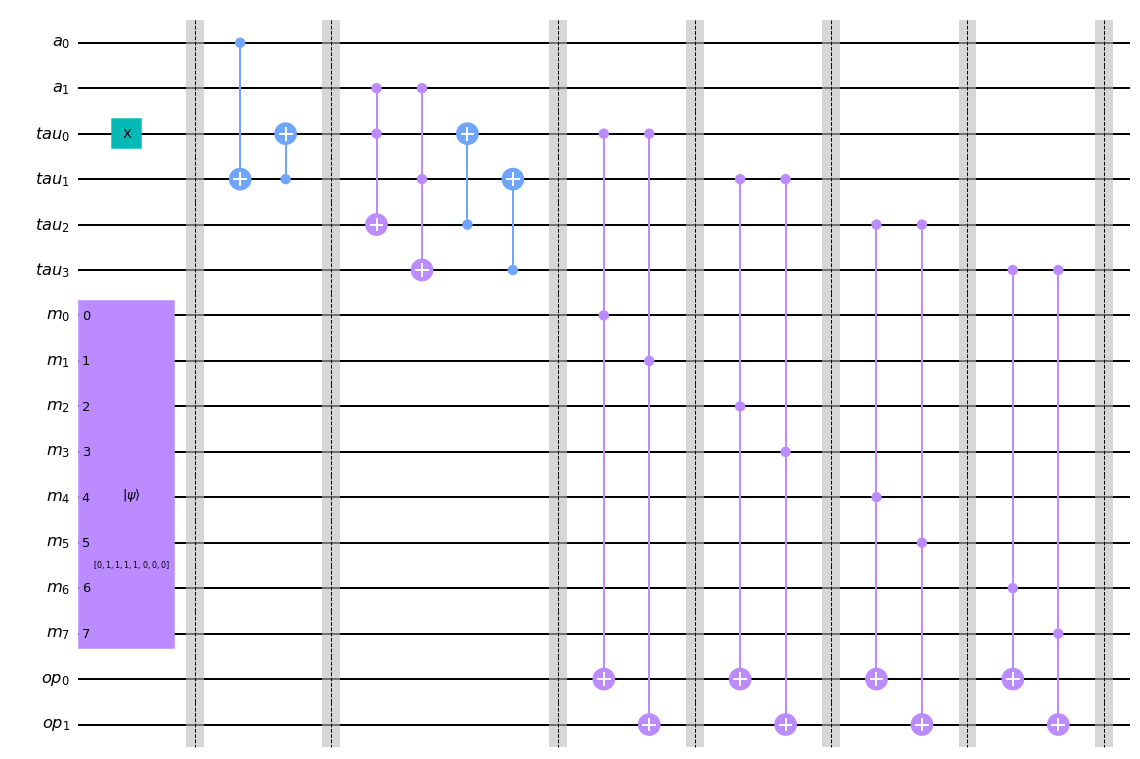

In [4]:
qram([0,1,3,2]).draw('mpl')